## Creating dataframe

In [1]:
import pandas as pd

data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [3]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

In [7]:
jsonPurchases = purchases.to_csv('purchases.json')

## IMDB csv

In [12]:
movies = pd.read_csv("/home/teo/Desktop/IMDB-Movie-Data.csv", index_col="Title")
movies.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [17]:
movies.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [18]:
movies.columns = [col.lower() for col in movies]
movies.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [23]:
movies.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [26]:
moviesNoNull = movies.dropna()
moviesNoNull.isnull().sum()

rank                0
genre               0
description         0
director            0
actors              0
year                0
runtime             0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64

In [27]:
revenue = movies['revenue_millions']
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

In [28]:
movies.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [29]:
movies['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [30]:
movies['genre'].value_counts().head()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
Name: genre, dtype: int64

Showing bivariate relationship

In [31]:
movies.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
revenue_millions,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [40]:
movies[movies['director'] == 'Ridley Scott']

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [46]:
movies[(movies['rating'] >= 8.6) & (movies['year'] >= 2009)].head(6)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
The Intouchables,250,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0


In [91]:
movies[
    ((movies['genre'].str.contains("Drama") == False))
    & (movies['rating'] > 7.0)
    & (movies['votes'] < movies['votes'].quantile(0.20))
].sort_values(by=['votes'], ascending=False).head(9)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Anthropoid,521,"Biography,History,Thriller",Based on the extraordinary true story of Opera...,Sean Ellis,"Jamie Dornan, Cillian Murphy, Brian Caspe, Kar...",2016,120,7.2,24100,2.96,59.0
Brimstone,140,"Mystery,Thriller,Western",From the moment the new reverend climbs the pu...,Martin Koolhoven,"Dakota Fanning, Guy Pearce, Kit Harington,Cari...",2016,148,7.1,13004,NaN,44.0
La tortue rouge,712,"Animation,Fantasy",A man is shipwrecked on a deserted island and ...,Michael Dudok de Wit,"Emmanuel Garijo, Tom Hudson, Baptiste Goy, Axe...",2016,80,7.6,11482,0.92,86.0
Boyka: Undisputed IV,124,Action,In the fourth installment of the fighting fran...,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",2016,86,7.4,10428,NaN,NaN
Contratiempo,104,"Crime,Mystery,Thriller",A young businessman faces a lawyer trying to p...,Oriol Paulo,"Mario Casas, Ana Wagener, José Coronado, Bárba...",2016,106,7.9,7204,NaN,NaN
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


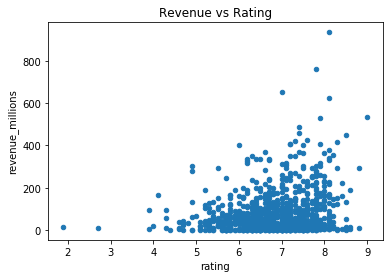

In [94]:
movies.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue vs Rating');

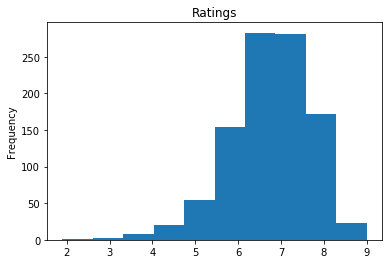

In [95]:
movies['rating'].plot(kind='hist', title='Ratings');